In [2]:
import pandas as pd

# Load the data
dogecoin = pd.read_parquet('../databases/dogecoin_pure.parquet')

# Preview the data
print(dogecoin.head())


                               Open      High       Low     Close     Volume
Date                                                                        
2022-09-18 00:00:00+00:00  0.062210  0.062210  0.057238  0.057520  265405124
2022-09-19 00:00:00+00:00  0.057519  0.058744  0.056180  0.058612  301268389
2022-09-20 00:00:00+00:00  0.058612  0.060262  0.057738  0.058417  294929293
2022-09-21 00:00:00+00:00  0.058423  0.060478  0.056378  0.057404  406017754
2022-09-22 00:00:00+00:00  0.057386  0.059838  0.056945  0.059599  241738855


In [4]:
# Reset the index to make 'Date' a regular column
dogecoin_reset = dogecoin.reset_index()
dogecoin_reset

,Date,Open,High,Low,Close,Volume
0,2022-09-18 00:00:00+00:00,0.062210,0.062210,0.057238,0.057520,265405124
1,2022-09-19 00:00:00+00:00,0.057519,0.058744,0.056180,0.058612,301268389
2,2022-09-20 00:00:00+00:00,0.058612,0.060262,0.057738,0.058417,294929293
3,2022-09-21 00:00:00+00:00,0.058423,0.060478,0.056378,0.057404,406017754
4,2022-09-22 00:00:00+00:00,0.057386,0.059838,0.056945,0.059599,241738855
...,...,...,...,...,...,...
727,2024-09-14 00:00:00+00:00,0.107113,0.107558,0.104643,0.105467,426157956
728,2024-09-15 00:00:00+00:00,0.105467,0.106359,0.102577,0.102933,428890116
729,2024-09-16 00:00:00+00:00,0.102938,0.103132,0.098458,0.099693,528755469
730,2024-09-17 00:00:00+00:00,0.099696,0.102467,0.098844,0.101137,480290242


In [5]:
# Prepare data for Prophet
dogecoin_prophet = dogecoin_reset[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [6]:
# Ensure the Date column is in the correct format (if not already done)
dogecoin_prophet['ds'] = pd.to_datetime(dogecoin_prophet['ds'])

# Remove the timezone information
dogecoin_prophet['ds'] = dogecoin_prophet['ds'].dt.tz_localize(None)


In [7]:
dogecoin_prophet

,ds,y
0,2022-09-18,0.057520
1,2022-09-19,0.058612
2,2022-09-20,0.058417
3,2022-09-21,0.057404
4,2022-09-22,0.059599
...,...,...
727,2024-09-14,0.105467
728,2024-09-15,0.102933
729,2024-09-16,0.099693
730,2024-09-17,0.101137


In [8]:
from prophet import Prophet

# Initialize the model
model = Prophet()

# Fit the model on the data
model.fit(dogecoin_prophet)


Importing plotly failed. Interactive plots will not work.
11:04:58 - cmdstanpy - INFO - Chain [1] start processing
11:04:58 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=30)  # Predicting for the next 30 days
forecast = model.predict(future)

# Print the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(30)

,ds,yhat,yhat_lower,yhat_upper
0,2022-09-18,0.075181,0.060025,0.090012
1,2022-09-19,0.074972,0.060060,0.090483
2,2022-09-20,0.073285,0.058276,0.087809
3,2022-09-21,0.072437,0.057485,0.088410
4,2022-09-22,0.071777,0.056053,0.086702
5,2022-09-23,0.071206,0.056461,0.087072
6,2022-09-24,0.071163,0.055891,0.086382
7,2022-09-25,0.070100,0.054576,0.083951
8,2022-09-26,0.069673,0.055028,0.084878
9,2022-09-27,0.067808,0.052672,0.082168


c:\Users\mario\OneDrive\Documentos\GitHub\cryptoseer\src\notebook\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mario\OneDrive\Documentos\GitHub\cryptoseer\src\notebook\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\mario\OneDrive\Documentos\GitHub\cryptoseer\src\notebook\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in

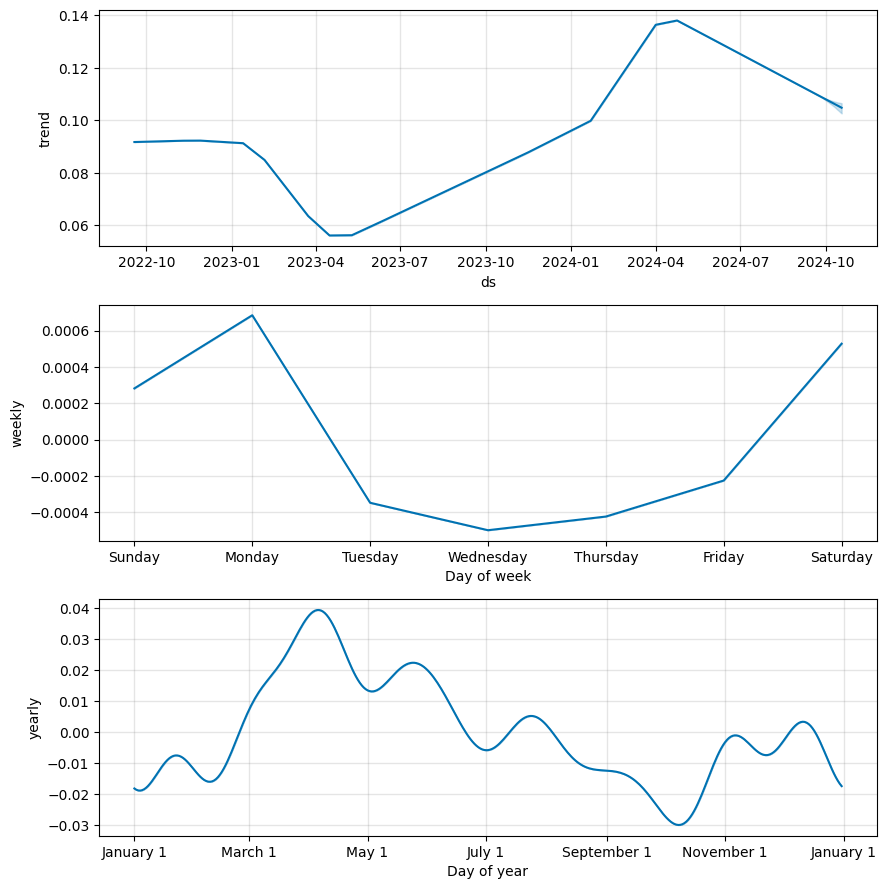

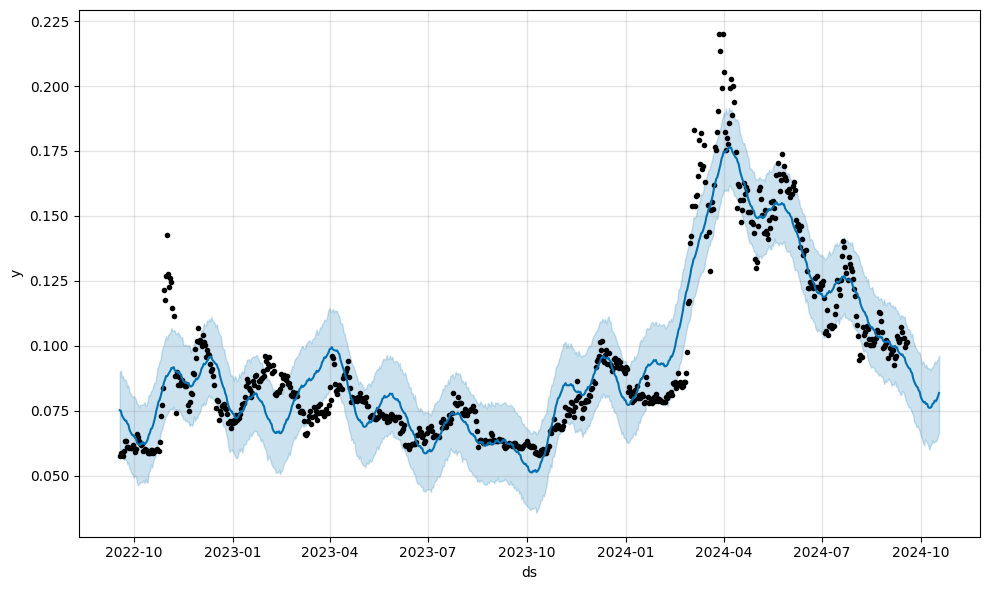

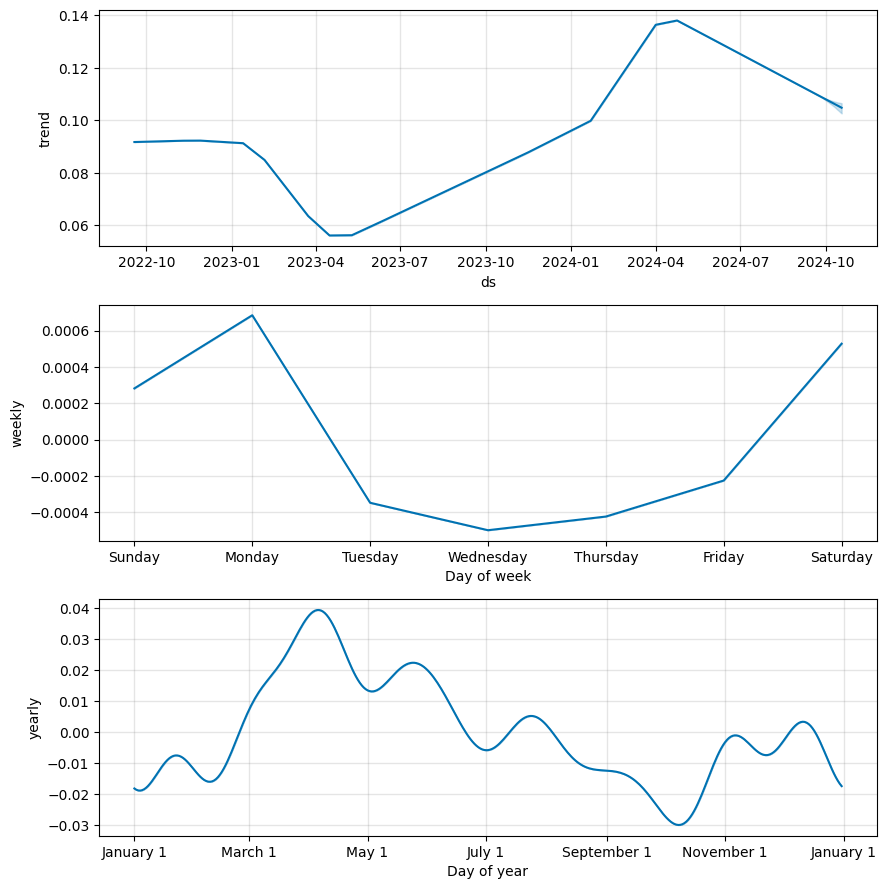

In [10]:
model.plot(forecast)
model.plot_components(forecast)


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming your Prophet predictions are stored in 'forecast'
# and you have the actual values in 'dogecoin_prophet['y']'

# Merge the actual and predicted values based on 'ds' (date)
evaluation_df = pd.merge(dogecoin_prophet[['ds', 'y']], forecast[['ds', 'yhat']], on='ds')

# Calculate regression metrics
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])
rmse = np.sqrt(mse)
r2 = r2_score(evaluation_df['y'], evaluation_df['yhat'])

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.00856494756810357
Mean Squared Error (MSE): 0.00013501139665331955
Root Mean Squared Error (RMSE): 0.011619440462144446
R-squared (R²): 0.878950545678328


In [13]:
import joblib

joblib.dump(model, '../models/prophet_model.joblib')

['../models/prophet_model.joblib']